# 1. Análise exploratória de dados


#### a. Carregue a base de dados media_precos_carros_brasil.csv

In [1]:
# importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')

In [2]:
# Carregando dados do arquivo precos_carros_brasil
dados = pd.read_csv('precos_carros_brasil.csv')

In [3]:
# Listando o nome das colunas
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [4]:
# Imprimindo somente as cinco primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [5]:
# Imprime o tipo de dado de cada coluna
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [6]:
# Imprimindo o tipo de dado de cada coluna após conversões
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [7]:
# Número de linhas e colunas
dados.shape

(267542, 11)

---

#### b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [8]:
# verificando se há valores faltantes nos dados
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [9]:
# verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

pelo o resultado é possível supor que pode haver um grande número de linhas inteiramente vazias

In [10]:
# verificando se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

65245

In [11]:
# Removendo todas as linhas que teem em todos os seus campos valores faltantes
dados.dropna(axis=0, how='all', inplace=True)

In [12]:
# Após correções, verificando novamente se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

0

In [13]:
# Após correções, verificando novamente a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

---

#### c. Verifique se há dados duplicados nos dados

In [14]:
# Verificando se há dados duplicados
dados.duplicated().sum()

2

In [15]:
# Removendo dados duplicados
dados.drop_duplicates(inplace=True)

In [16]:
# Verificando se ainda há dados duplicados após remoção dos dados duplicados
dados.duplicated().sum()

0

---

#### d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [17]:
# Convertendo engine_size de object para float64
dados['engine_size'] = dados['engine_size'].str.replace(',', '.').astype(float)

In [18]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [19]:
# Imprimindo alguns valores de medidas de tendências centrais
dados[numericas_cols].describe()

,year_of_reference,engine_size,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000,202295.000000
mean,2021.564695,1.822302,2011.271514,52756.765713
std,0.571904,0.734432,6.376241,51628.912116
min,2021.000000,1.000000,2000.000000,6647.000000
25%,2021.000000,1.400000,2006.000000,22855.000000
50%,2022.000000,1.600000,2012.000000,38027.000000
75%,2022.000000,2.000000,2016.000000,64064.000000
max,2023.000000,6.200000,2023.000000,979358.000000


In [20]:
# Imprimindo resumos de variáveis categóricas - estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear
count,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual
freq,24260,425,1,44962,425,168684,161883


---
---
# 2. Visualização de dados

#### a. Gere um gráfico da distribuição da quantidade de carros por marca

In [21]:
# Determinar a quantidade de elementos para cada marca de carro
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

Text(0, 0.5, 'Total de carros')

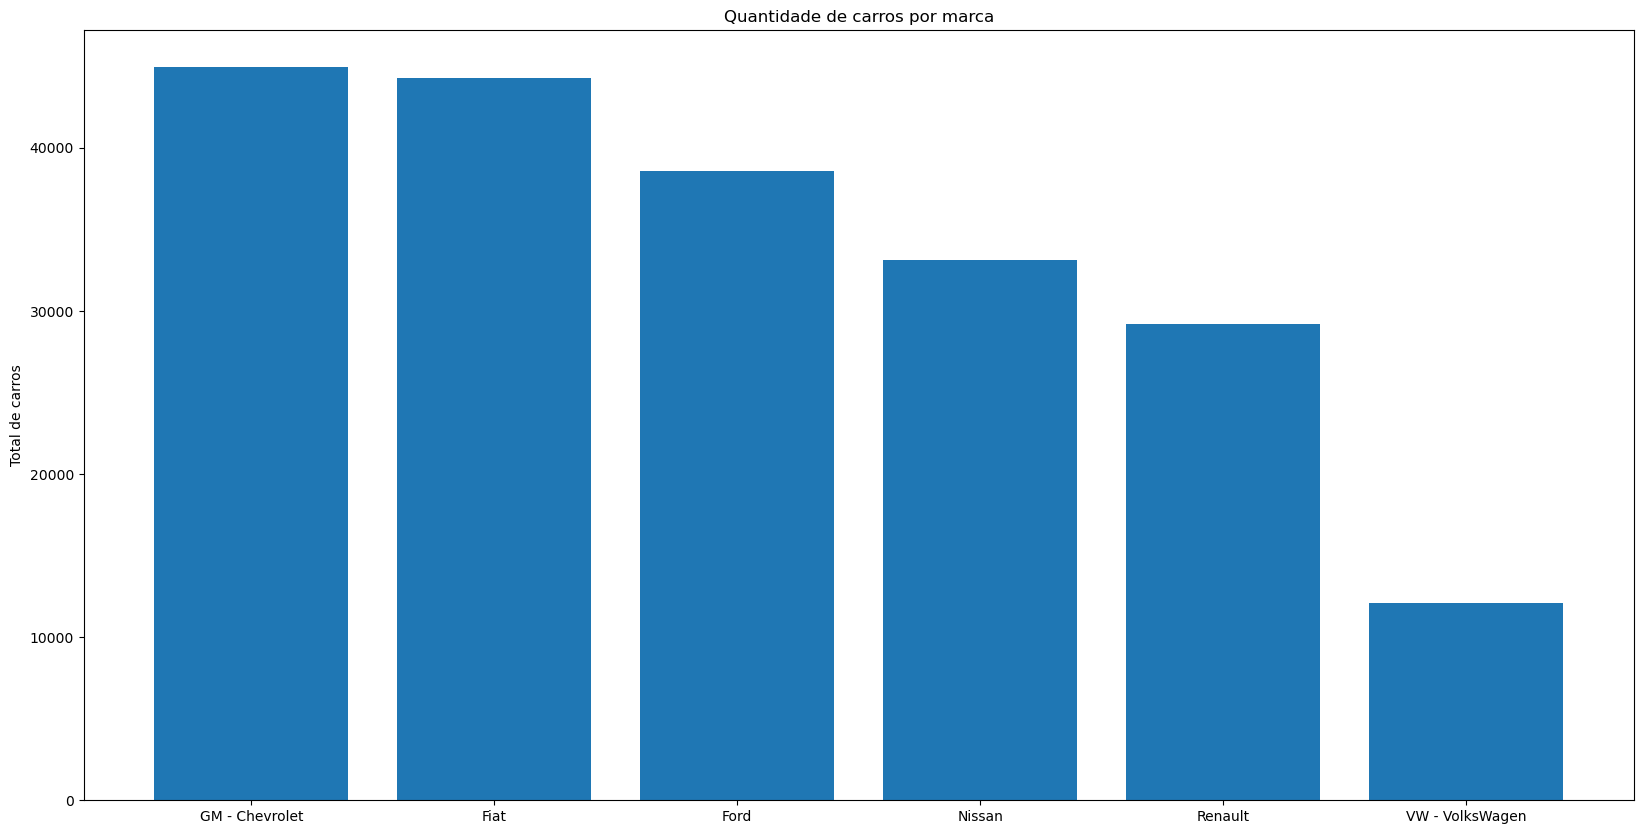

In [22]:
# Gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(20,10)) # Tamanho da imagem do gráfico
plt.bar(dados['brand'].unique(), dados['brand'].value_counts()) # gráfico de barras - eixos X e Y
plt.title('Quantidade de carros por marca') # inserir título no gráfico
plt.ylabel('Total de carros') # inserir rótulo no eixo Y

---

#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro


In [23]:
# Determinar a quantidade de carros para cada tipo de engrenagem do carro (câmbio)
dados['gear'].value_counts()

gear
manual       161883
automatic     40412
Name: count, dtype: int64

Text(0, 0.5, 'Número de carros')

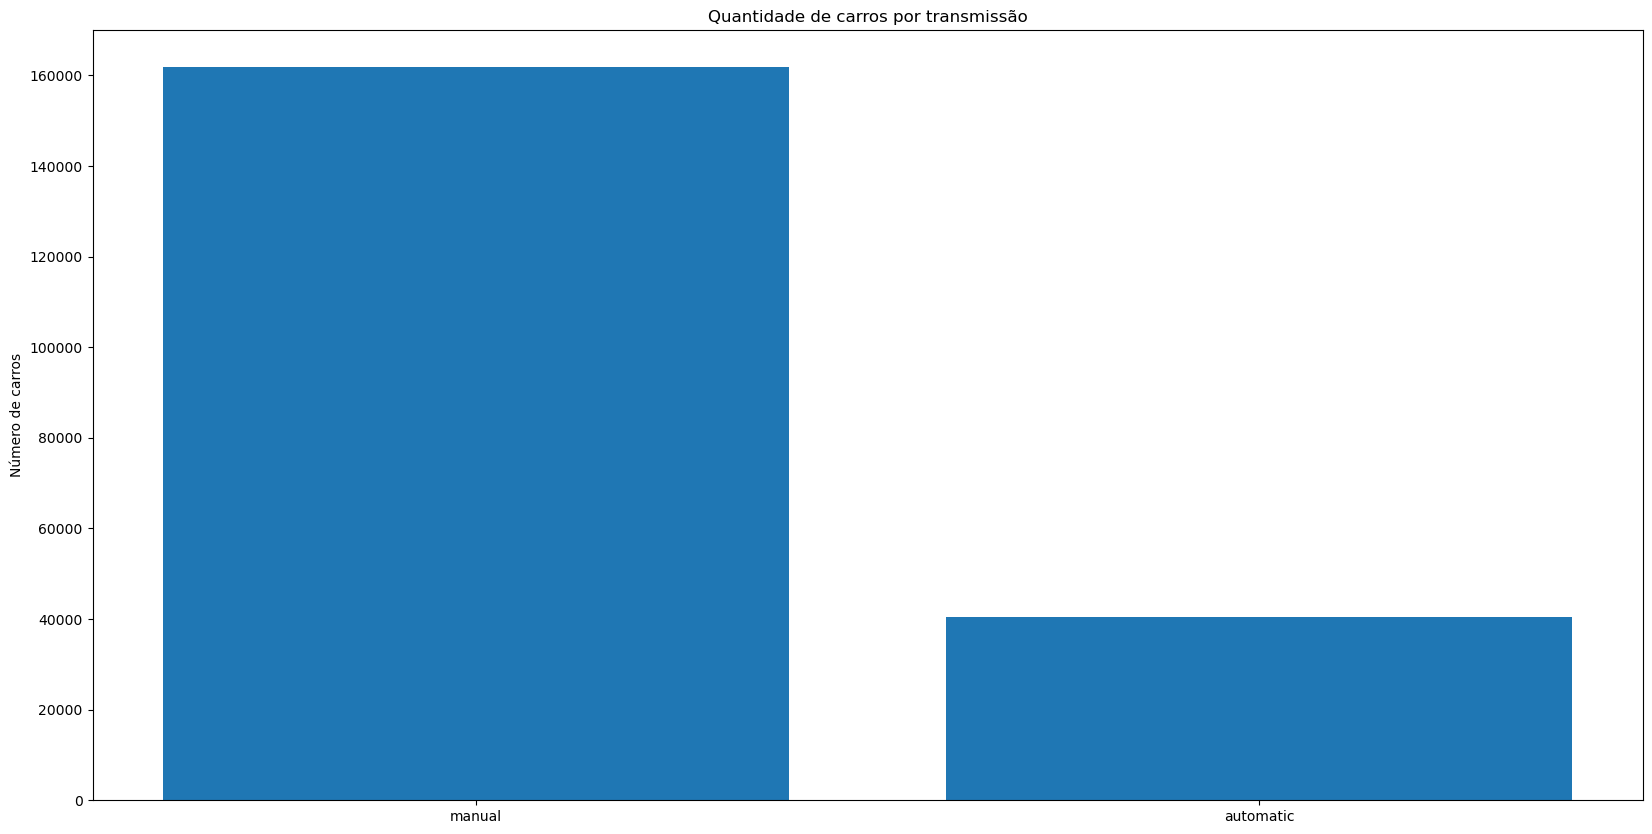

In [24]:
# Gráfico da distribuição de carros por tipo de engrenagem de carro (câmbio)
plt.figure(figsize=(20,10)) # Tamanho da imagem do gráfico
plt.bar(dados['gear'].unique(), dados['gear'].value_counts()) # gráfico de barras - eixos X e Y
plt.title('Quantidade de carros por transmissão') # inserir título no gráfico
plt.ylabel('Número de carros') # inserir rótulo no eixo Y

---

#### c.  Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [25]:
# Arrendondar ano de referência - remover a parte decimal
dados['year_of_reference'] = dados['year_of_reference'].round().astype(int)

In [26]:
# Obter somente carros do ano de 2022
cars_in_2022 = dados[dados['year_of_reference'] == 2022]
cars_in_2022.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
96280,2022,January,004001-0,gzw0hkct8cj4,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002.0,12330.0
96281,2022,January,004001-0,gm2ws5yqjnfx,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001.0,11408.0
96282,2022,January,004001-0,gbvgy7432kp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000.0,10620.0
96283,2022,January,004001-0,gvx412fg8v0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000.0,11992.0
96284,2022,January,004003-7,jtskpmg524fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001.0,17182.0


In [27]:
# Definir a ordem dos meses customizada
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [28]:
# Agrupar os preços médios dos carros em cada mês
cars_in_2022['month_of_reference'] = pd.Categorical(cars_in_2022['month_of_reference'], categories=month_order, ordered=True)
cars_avg_price_in_2022 = cars_in_2022.groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)
cars_avg_price_in_2022.head()

month_of_reference
January     54840.0
February    55825.0
March       56849.0
April       57150.0
May         57800.0
Name: avg_price_brl, dtype: float64

In [29]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
cars_avg_price_in_2022 = cars_avg_price_in_2022.reset_index(name='average_price')
cars_avg_price_in_2022.head()

,month_of_reference,average_price
0,January,54840.0
1,February,55825.0
2,March,56849.0
3,April,57150.0
4,May,57800.0


<Figure size 2000x1000 with 0 Axes>

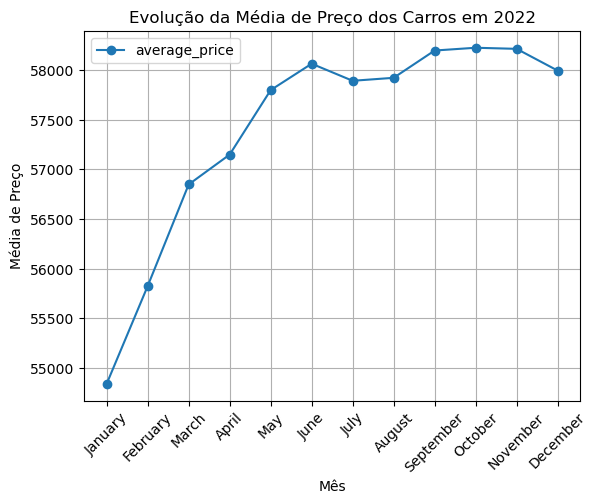

In [30]:
plt.figure(figsize=(20, 10))
cars_avg_price_in_2022.plot(kind='line', marker='o')
plt.title('Evolução da Média de Preço dos Carros em 2022')
plt.xlabel('Mês')
plt.ylabel('Média de Preço')
plt.xticks(cars_avg_price_in_2022.index, month_order, rotation=45)
plt.grid(True)

---

#### d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [31]:
# Agrupar média de preços médios dos carros por marcar e tipo de engrenagem
car_gear_brand_avg_price = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0)
car_gear_brand_avg_price.head()

brand           gear     
Fiat            automatic    97397.0
                manual       39694.0
Ford            automatic    84769.0
                manual       51784.0
GM - Chevrolet  automatic    88157.0
Name: avg_price_brl, dtype: float64

In [32]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
car_gear_brand_avg_price = car_gear_brand_avg_price.reset_index(name='average_price')
car_gear_brand_avg_price.head()

,brand,gear,average_price
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


(array([0, 1]), [Text(0, 0, 'automatic'), Text(1, 0, 'manual')])

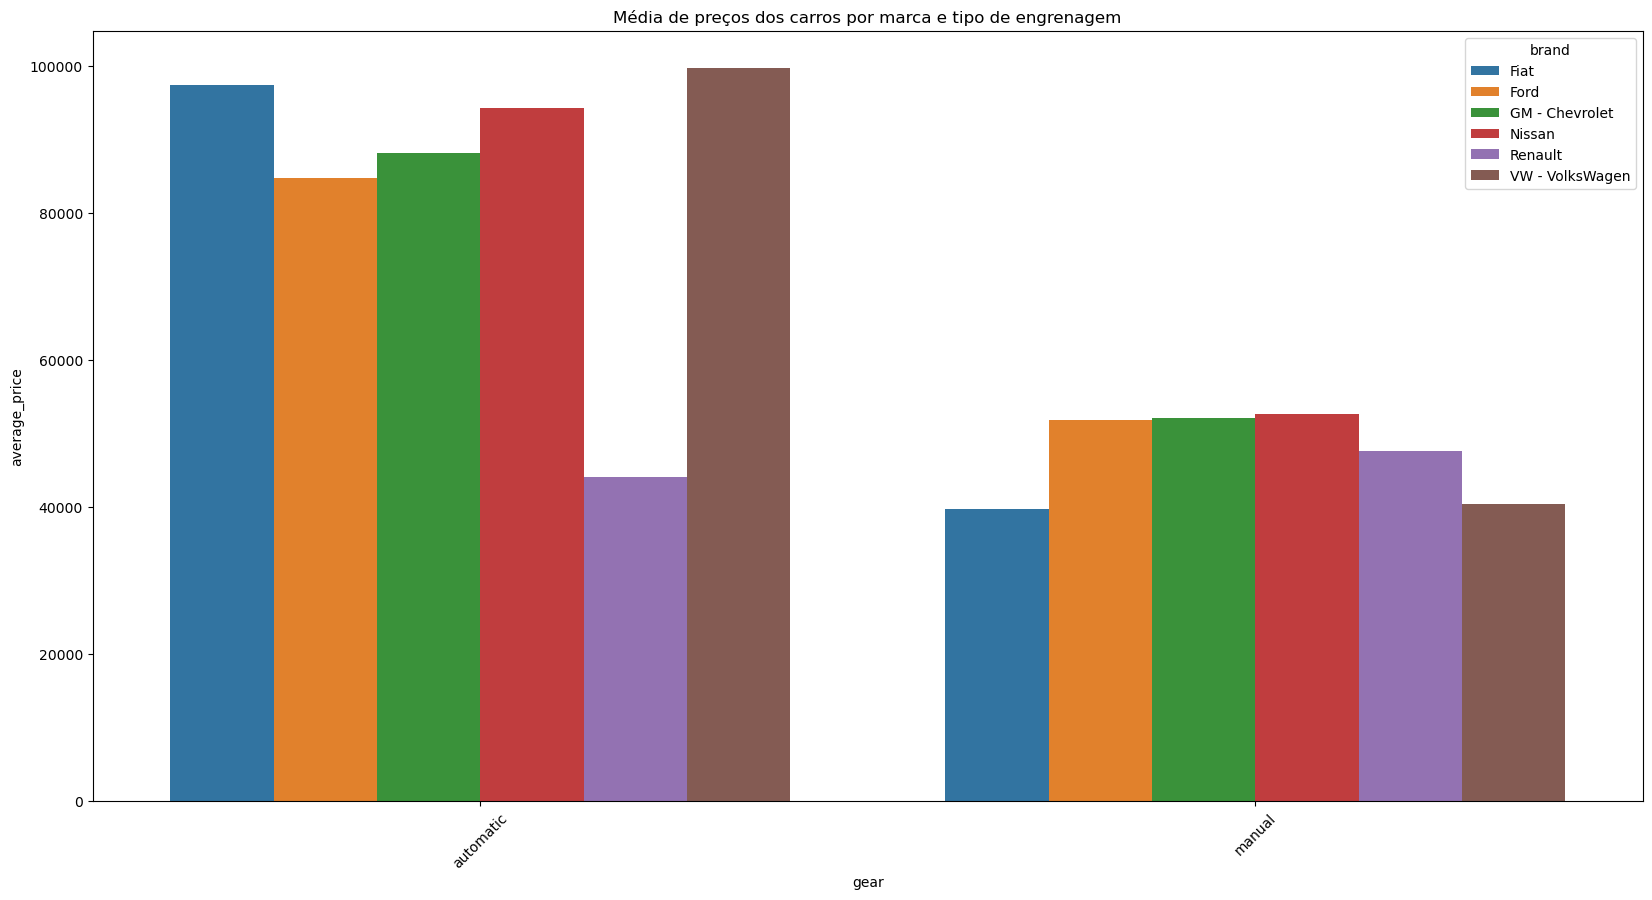

In [33]:
# Gerar o gráfico de distruibuição média dos preços dos carros por marca e tipo de engrenagem
plt.figure(figsize=(20,10))
sns.barplot(
  x='gear', 
  y='average_price', 
  hue='brand', 
  data=car_gear_brand_avg_price, 
  hue_order=car_gear_brand_avg_price['brand'].unique()
)
plt.title('Média de preços dos carros por marca e tipo de engrenagem')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fiat'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'GM - Chevrolet'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Renault'),
  Text(5, 0, 'VW - VolksWagen')])

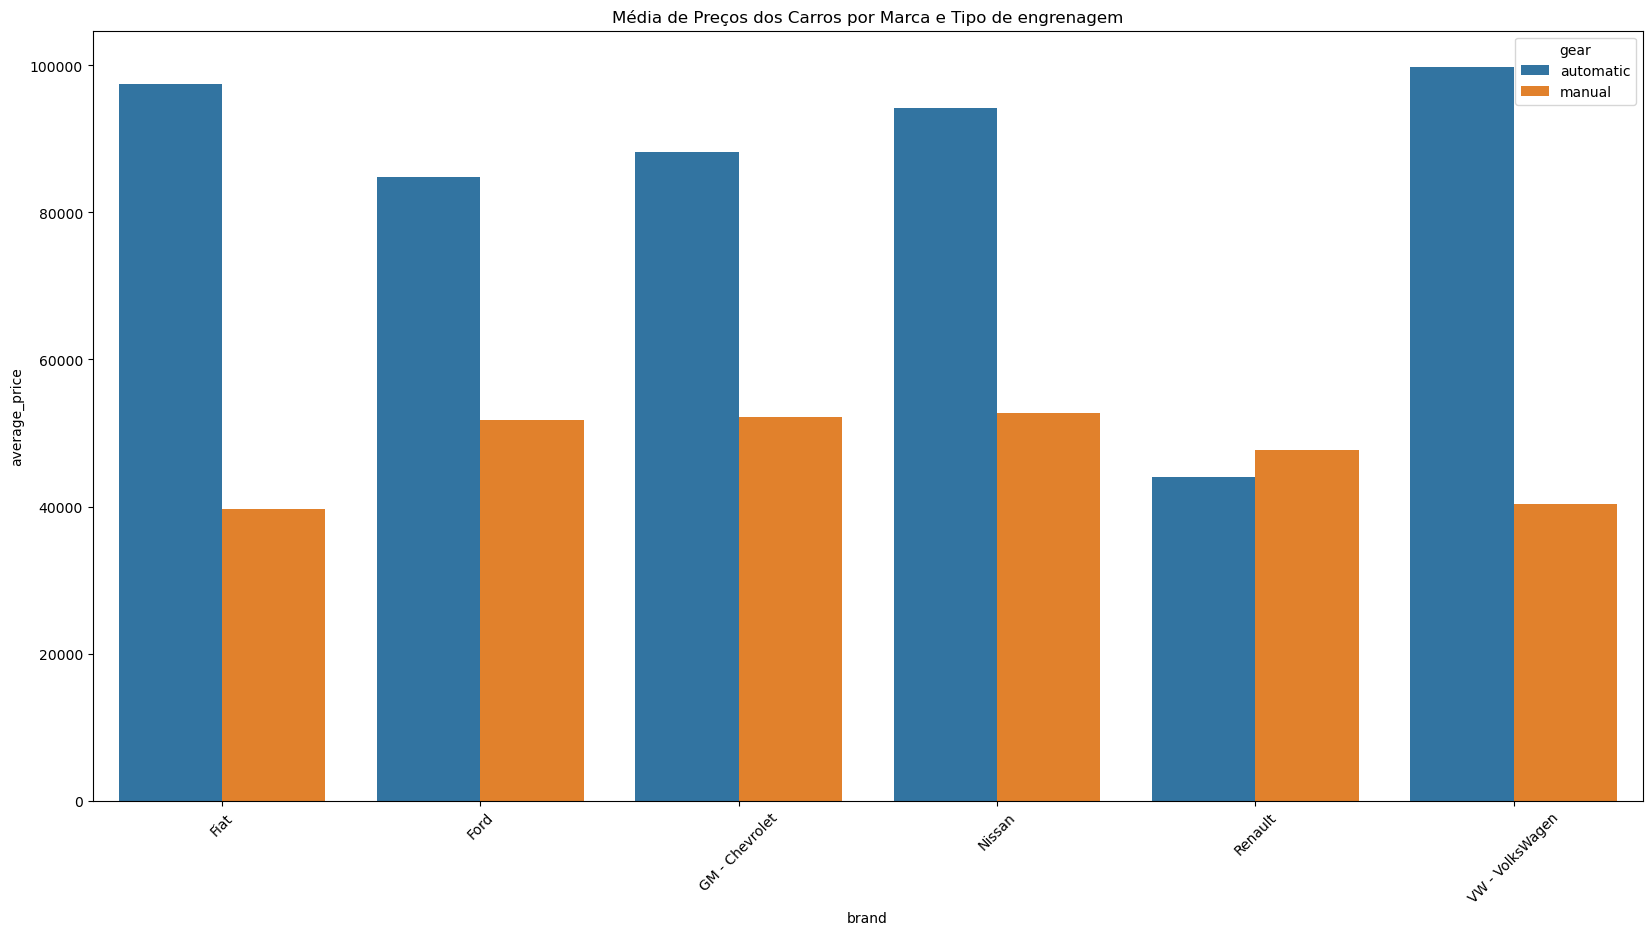

In [34]:
# Gerar o segundo tipo de gráfico de distruibuição média dos preços dos carros por marca e tipo de engrenagem
plt.figure(figsize=(20,10))
sns.barplot(
  x='brand', 
  y='average_price', 
  hue='gear', 
  data=car_gear_brand_avg_price, 
  hue_order=car_gear_brand_avg_price['gear'].unique()
)
plt.title('Média de Preços dos Carros por Marca e Tipo de engrenagem')
plt.xticks(rotation=45)

---

#### f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [35]:
# Agrupar média de preços médios dos carros por marcar e tipo de combustível
cars_avg_price_brand_fuel = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0)
cars_avg_price_brand_fuel.head()

brand  fuel    
Fiat   Alcohol     11510.0
       Diesel      99814.0
       Gasoline    37197.0
Ford   Alcohol     10149.0
       Diesel      94526.0
Name: avg_price_brl, dtype: float64

In [36]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
cars_avg_price_brand_fuel = cars_avg_price_brand_fuel.reset_index(name='average_price')
cars_avg_price_brand_fuel.head()

,brand,fuel,average_price
0,Fiat,Alcohol,11510.0
1,Fiat,Diesel,99814.0
2,Fiat,Gasoline,37197.0
3,Ford,Alcohol,10149.0
4,Ford,Diesel,94526.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fiat'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'GM - Chevrolet'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Renault'),
  Text(5, 0, 'VW - VolksWagen')])

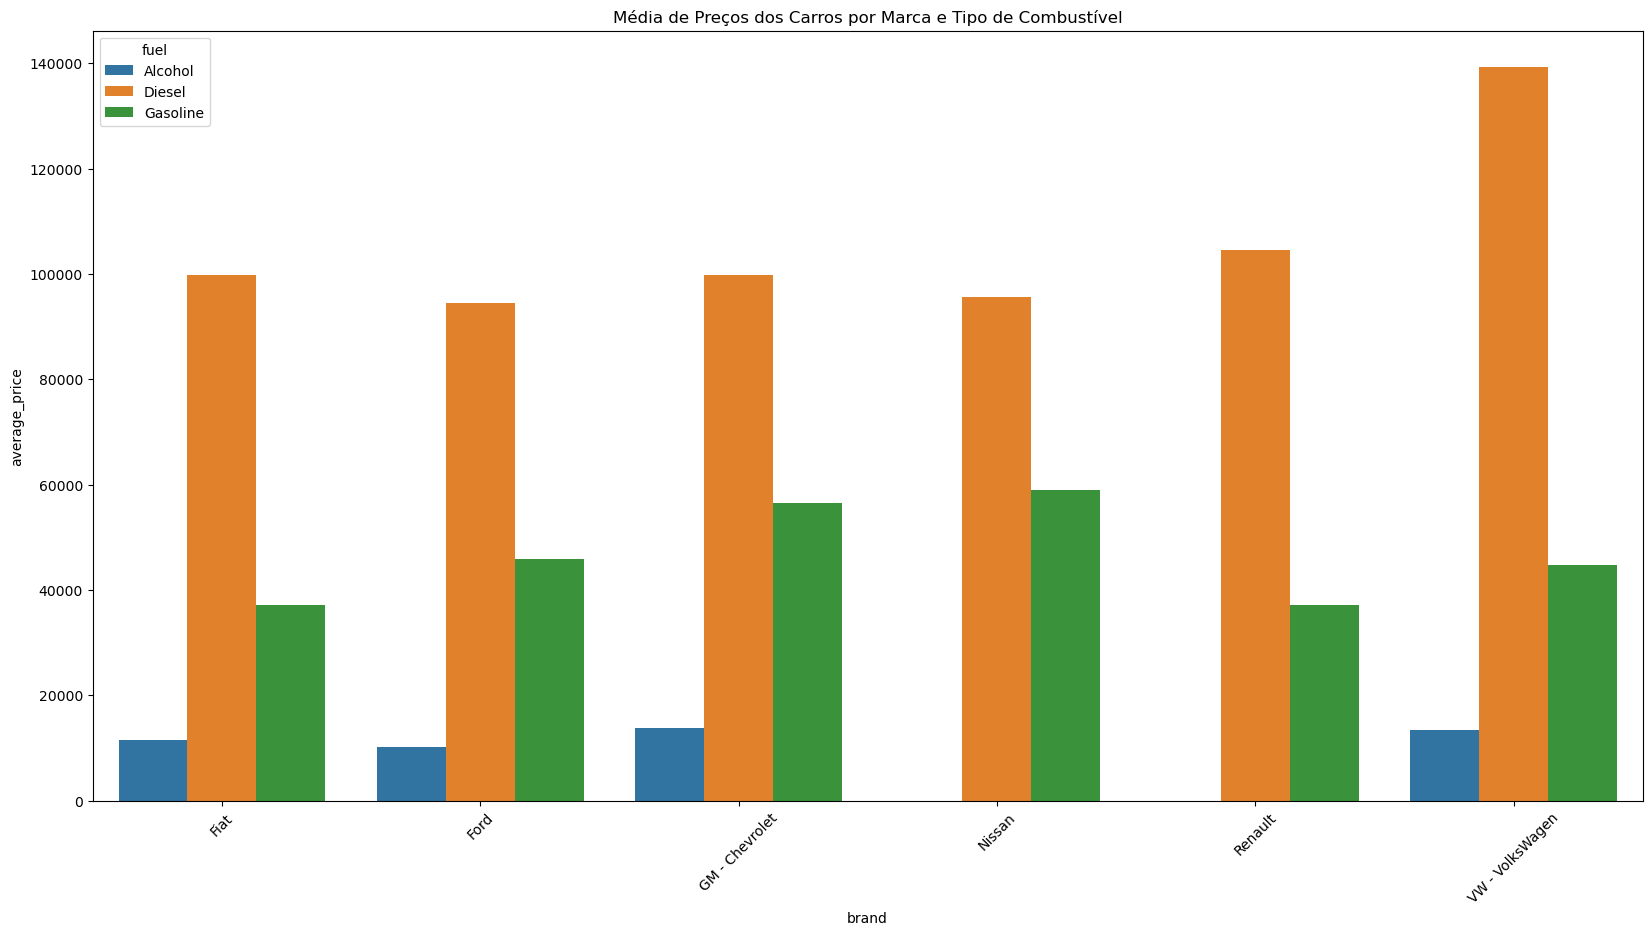

In [37]:
# Gerar gráfico de média de preços médios de carros por marcar e tipo de combustível
plt.figure(figsize=(20, 10))
sns.barplot(
  x='brand', 
  y='average_price',
  hue='fuel',
  data=cars_avg_price_brand_fuel,
  hue_order=cars_avg_price_brand_fuel['fuel'].unique()
)
plt.title('Média de Preços dos Carros por Marca e Tipo de Combustível')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Alcohol'), Text(1, 0, 'Diesel'), Text(2, 0, 'Gasoline')])

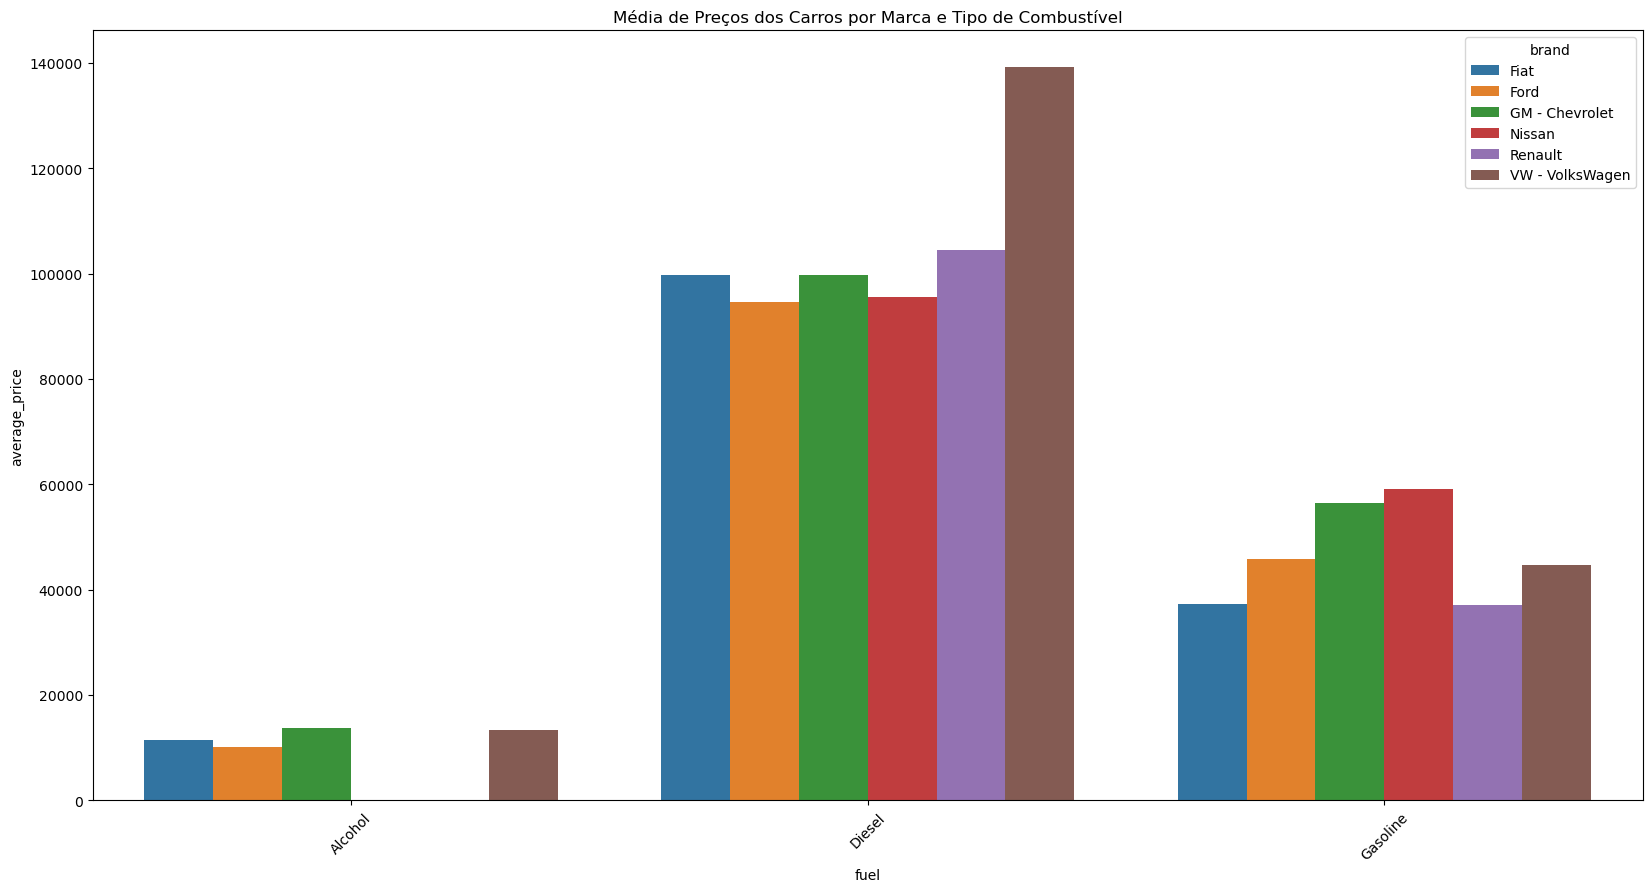

In [38]:
# Gerar gráfico de média de preços médios de carros por marcar e tipo de combustível - Segundo tipo
plt.figure(figsize=(20, 10))
sns.barplot(
  x='fuel', 
  y='average_price',
  hue='brand',
  data=cars_avg_price_brand_fuel,
  hue_order=cars_avg_price_brand_fuel['brand'].unique()
)
plt.title('Média de Preços dos Carros por Marca e Tipo de Combustível')
plt.xticks(rotation=45)

---
---
#### 3. Aplicação de modelos de machine learning para prever o preço médio dos carros 

a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002.0,9162.0
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001.0,8832.0
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000.0,8388.0
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000.0,8453.0
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001.0,12525.0


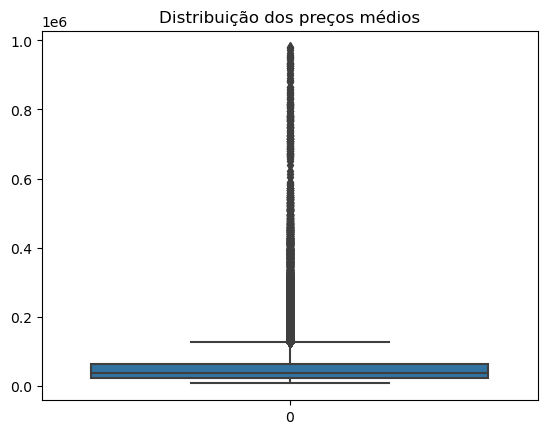

In [39]:
# Gráfico de distribuição boxplot dos preços médios dos carros 
sns.boxplot(dados['avg_price_brl']).set_title('Distribuição dos preços médios')
dados.head()

In [40]:
# Transformar mês de referência em uma variável numérica

dados['month_of_reference'] = LabelEncoder().fit_transform(dados['month_of_reference']) 
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002.0,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001.0,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000.0,8388.0
3,2021,4,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000.0,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001.0,12525.0


In [41]:
# Transformar marca de carro em uma variável numérica
dados['brand'] = LabelEncoder().fit_transform(dados['brand'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002.0,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001.0,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000.0,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000.0,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001.0,12525.0


In [42]:
# Transformar modelo de carro em uma variável numérica
dados['model'] = LabelEncoder().fit_transform(dados['model'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,Gasoline,manual,1.0,2002.0,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,Gasoline,manual,1.0,2001.0,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,Gasoline,manual,1.0,2000.0,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,Alcohol,manual,1.0,2000.0,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,Gasoline,manual,1.6,2001.0,12525.0


In [43]:
# Transformar tipo de combustível em uma variável numérica
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,2,manual,1.0,2002.0,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,2,manual,1.0,2001.0,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,2,manual,1.0,2000.0,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,0,manual,1.0,2000.0,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,2,manual,1.6,2001.0,12525.0


In [44]:
# Transformar tipo de transmissão em uma variável numérica
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,2,1,1.0,2002.0,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,2,1,1.0,2001.0,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,2,1,1.0,2000.0,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,0,1,1.0,2000.0,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,2,1,1.6,2001.0,12525.0


In [45]:
# Remover as variáveis de entrada que não são consideradas importantes para a predição

dados_interesting = dados.drop([
  'fipe_code',
  'authentication',
  'year_of_reference',
  'year_model'], axis=1
)
dados_interesting.head()

,month_of_reference,brand,model,fuel,gear,engine_size,avg_price_brl
0,4,2,297,2,1,1.0,9162.0
1,4,2,297,2,1,1.0,8832.0
2,4,2,297,2,1,1.0,8388.0
3,4,2,297,0,1,1.0,8453.0
4,4,2,260,2,1,1.6,12525.0


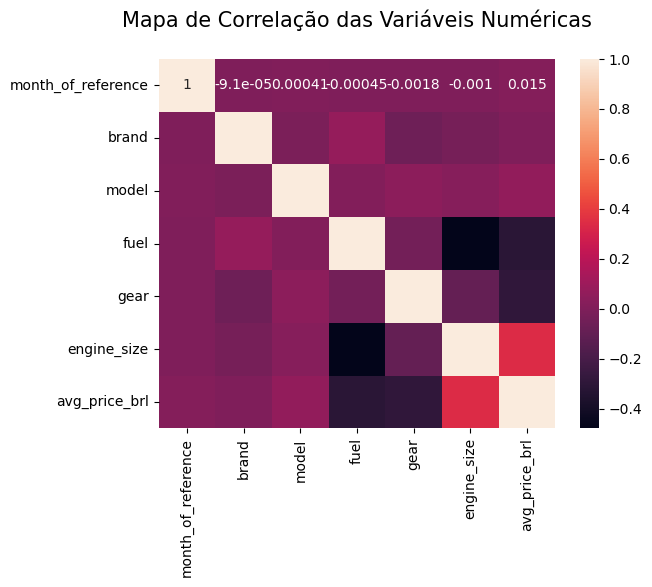

In [46]:
# Mapa de correlação das variáveis numéricas com variável Target

sns.heatmap(dados_interesting.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [47]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target
X = dados_interesting.drop(['avg_price_brl'], axis=1)
X.head()

,month_of_reference,brand,model,fuel,gear,engine_size
0,4,2,297,2,1,1.0
1,4,2,297,2,1,1.0
2,4,2,297,2,1,1.0
3,4,2,297,0,1,1.0
4,4,2,260,2,1,1.6


In [48]:
# Variável Y contém apenas a variável target - avg_price_brl
Y = dados_interesting['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [49]:
# Divisão: 30% dos dados são de teste e 70% de treinamento
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [50]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(141606, 6)


,month_of_reference,brand,model,fuel,gear,engine_size
100552,4,1,412,2,1,1.6


In [51]:
# Observando os dados de teste
print(x_test.shape)
y_test.head(1)

(60689, 6)


180633    42595.0
Name: avg_price_brl, dtype: float64

In [52]:
# Observando a variável target
y_test.head()

180633    42595.0
13130     10989.0
163315     9087.0
121464    26965.0
14044     57102.0
Name: avg_price_brl, dtype: float64

c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros

Modelo Random Forest sem parametros

In [53]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [54]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

Agora, testando o mesmo modelo, mas utilizando parâmetros do algoritmo Random Forest

In [55]:
# Random Forest com os hiperparametros: 
# max_depth -> profundidade máxima em cada árvore
# min_samples_leaf -> apenas folhas com determinado número mínimo de amostras
# min_samples_split -> o número mínimo necessário de amostras que um nó deve ter para ser divido (ou expandido)
# n_estimators -> o número de árvores decisão que serão criadas
# random_state -> serve para garantir a reprodutibilidade dos resultados. Controla a randomização aplicada.

model_rf_paramenters = RandomForestRegressor(
  max_depth=29,
  min_samples_leaf=32,
  min_samples_split=28,
  n_estimators=208,
  random_state=43
)

In [56]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf_paramenters.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

Agora, usando o XGboost. Biblioteca XGBRegressor sem parametros

In [57]:
# Algoritmo XGBoost sem parametros
model_xg = XGBRegressor()

In [58]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Agora, usando o XGBoostRegressor com os 17 parâmetros mais conhecidos

In [59]:
# learning_rate -> Taxa de aprendizado ou encolhimento do tamanho do passo usado em cada iteração de boosting para previnir o overfitting
# n_estimators -> The number of boosting rounds (trees) to be run,
# max_depth -> Maximum depth of a tree. Increasing this value makes the model more complex and can lead to overfitting,
# min_child_weight -> Minimum sum of instance weight (hessian) needed in a child. It helps control overfitting by constraining the minimum amount of samples required to split a node.,
# gamma -> Minimum loss reduction required to make a further partition on a leaf node of the tree. It acts as a regularization parameter by controlling the complexity of the trees.,
# subsample -> ,
# colsample_bytree=0.9,
# colsample_byleve=0.9,
# colsample_bynode=0.9,
# reg_alpha=0.9,
# reg_lambda=0.9,
# scale_pos_weight=0.9,
# base_score=0.7,
# random_state=1,
# objective='reg:squarederror',
# booster='dart',
# n_jobs=0,

# Algoritmo XGBoost com parametros
model_parameters_xg = XGBRegressor(
  learning_rate=1, 
  n_estimators=100,
  max_depth=25,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  reg_alpha=0,
  reg_lambda=1,
  random_state=42,
  n_jobs=-1
)

In [60]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_parameters_xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

d. Grave os valores preditos em variáveis criadas

In [61]:
# Predição dos valores de preço médio dos carros com base nos dados de teste - Random Forest sem parametros
predicted_values_rf = model_rf.predict(x_test)

In [62]:
# valores preditos - Random Forest sem parametros
predicted_values_rf

array([ 38244.07700794,  16602.21530456,  12375.13979563, ...,
       266050.27196588, 110313.05729018,  68341.58083333])

In [63]:
# Predição dos valores de preço médio dos carros com base nos dados de teste - Random Forest com parametros
predicted_values_parameters_rf = model_rf_paramenters.predict(x_test)

In [64]:
# Valores preditor - Random Forest com parametros
predicted_values_parameters_rf

array([ 40067.94822053,  18469.3153655 ,  12931.10244967, ...,
       242268.26208664, 112287.91477224,  60319.05531335])

In [65]:
# Predição dos valores de preços médios dos carros com base nos dados de teste - XGBoost sem parametros
predicted_values_xg = model_xg.predict(x_test)


In [66]:
# Valores preditos - XGBoost sem parametros
predicted_values_xg

array([ 37883.188,  14262.775,  20443.906, ..., 295647.7  , 111701.36 ,
        55877.3  ], dtype=float32)

In [67]:
# Predição dos valores de preços médios dos carros com base nos dados de teste - XGBoost com parametros
predicted_values_parameters_xg = model_parameters_xg.predict(x_test)

In [68]:
# Valores preditos - XGBoost com parametros
predicted_values_parameters_xg

array([ 39482.96 ,  13401.743,  15155.777, ..., 296850.75 , 107025.984,
        52393.65 ], dtype=float32)

e. Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado

In [69]:
# Análise da importancia das variáveis para estimar a variável target - Random Forest sem parametros
model_rf.feature_importances_

feature_importances_rf = pd.DataFrame(
  model_rf.feature_importances_,
  index = X_train.columns,
  columns = ['importances']
).sort_values('importances', ascending=True)

feature_importances_rf

,importances
month_of_reference,0.012734
brand,0.031599
fuel,0.106393
gear,0.128159
model,0.286124
engine_size,0.434991


In [70]:
# Análise da importancia das variáveis para estimar a variável target - Random Forest com parametros
model_rf_paramenters.feature_importances_

feature_importances_parameters_rf = pd.DataFrame(
  model_rf_paramenters.feature_importances_,
  index = X_train.columns,
  columns = ['importances']
).sort_values('importances', ascending=True)

feature_importances_parameters_rf

,importances
month_of_reference,0.002765
brand,0.031128
fuel,0.101806
gear,0.131039
model,0.279785
engine_size,0.453477


In [71]:
# Análise da importancia das variáveis para estimar a variável target - XGBoost com parametros
model_parameters_xg.feature_importances_

feature_importances_parameters_xg = pd.DataFrame(
  model_rf_paramenters.feature_importances_,
  index = X_train.columns,
  columns = ['importances']
).sort_values('importances', ascending=True)

feature_importances_parameters_xg

,importances
month_of_reference,0.002765
brand,0.031128
fuel,0.101806
gear,0.131039
model,0.279785
engine_size,0.453477


In [72]:
# Analisando a importância das variáveis para estimar a variável target - XGBoost sem parametros
model_xg.feature_importances_

feature_importances_xg = pd.DataFrame(
  model_xg.feature_importances_,
  index=X_train.columns,
  columns=['importances']
).sort_values('importances', ascending=True)

feature_importances_xg

,importances
month_of_reference,0.001042
model,0.060784
brand,0.075573
engine_size,0.256271
gear,0.285502
fuel,0.320828


f. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis

g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R2

In [73]:
# MSE - calcula o erro quadrático médio das predições do modelo - Random Forest sem parametro
mse_rf = mean_squared_error(y_test, predicted_values_rf)
mse_rf

322112424.3965638

In [74]:
# O MAE calcula a média da diferença absoluta entre o valor predito e o valor real - Random Forest sem parametro
mea_rf = mean_absolute_error(y_test, predicted_values_rf)
mea_rf

8789.26928040309

In [75]:
# O R² é uma métrica que varia entre 0 e 1 e é uma razão que indica o quão bom o nosso modelo - Random Forest sem parametros
r2_score(y_test, predicted_values_rf)

0.8799406352309909

In [76]:
# O MSE - Random Forest com parametros
mse_parameters_rf = mean_squared_error(y_test, predicted_values_parameters_rf)
mse_parameters_rf

342078982.87176037

In [77]:
# O MAE - Random Forest com parametros
mae_parameters_rf = mean_absolute_error(y_test, predicted_values_parameters_rf)
mae_parameters_rf

8883.81158518093

In [78]:
# R2 score - Random Forest com parametros
r2_score(y_test, predicted_values_parameters_rf)

0.8724985990175597

In [79]:
# MSE - XGBoost sem parametros
mse_xg = mean_squared_error(y_test, predicted_values_xg)
mse_xg

423969570.7215305

In [80]:
# MAE - XGBoost sem parametros
mae_xg = mean_absolute_error(y_test, predicted_values_xg)
mae_xg

11231.37301708203

In [81]:
# R2 score - XGBoost sem parametros
r2_score(y_test, predicted_values_xg)

0.841975926766644

In [82]:
# MSE - XGBoost com parametros
mse_parameters_xg = mean_squared_error(y_test, predicted_values_parameters_xg)
mse_parameters_xg

440452558.6749205

In [83]:
# MAE - XGBoost com parametros
mae_parameters_xg = mean_absolute_error(y_test, predicted_values_parameters_xg)
mae_parameters_xg

11289.457399512574

In [84]:
# R2 score - XGBoost com parametros
r2_score(y_test, predicted_values_parameters_xg)

0.8358323044990879

h. Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor resultado e a métrica de avaliação utilizada